In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np
import xarray as xr

import glob

In [14]:
# open the file containing the Mars Climate Database v5.3 - Mean variables
ds = xr.open_dataset('/glade/u/home/marsh/planets/mars/MCD5.3/data/clim_aveEUV/clim_01_me.nc', \
                     decode_times=False)

In [15]:
ds

<xarray.Dataset>
Dimensions:       (Time: 12, latitude: 49, longitude: 64, altitude: 30)
Coordinates:
  * Time          (Time) float32 2.0 4.0 6.0 8.0 10.0 ... 18.0 20.0 22.0 24.0
  * latitude      (latitude) float32 90.0 86.25 82.5 ... -82.5 -86.25 -90.0
  * longitude     (longitude) float32 -180.0 -174.4 -168.8 ... 163.1 168.8 174.4
  * altitude      (altitude) float32 0.004481 0.02354 0.07477 ... 101.3 108.3
Data variables: (12/48)
    aps           (altitude) float32 ...
    bps           (altitude) float32 ...
    tsurf         (Time, latitude, longitude) float32 ...
    ps            (Time, latitude, longitude) float32 ...
    co2ice        (Time, latitude, longitude) float32 ...
    fluxsurf_lw   (Time, latitude, longitude) float32 ...
    ...            ...
    vmr_ar        (Time, altitude, latitude, longitude) float32 ...
    vmr_elec      (Time, altitude, latitude, longitude) float32 ...
    vmr_he        (Time, altitude, latitude, longitude) float32 ...
    dustq         (Time, altitude, latitude, longitude) float32 ...
    reffdust      (Time, altitude, latitude, longitude) float32 ...
    reffice       (Time, altitude, latitude, longitude) float32 ...
Attributes:
    history:      Mars Climate Database v5.3 - Mean variables
    institution:  LMD-OU-AOPP-IAA-ESA-CNES

In [10]:
# extract PS, T, U and V and calculate the zonal meanst = ds.temp.mean(dim=['longitude','Time']) # temperature (K)

ps = ds.ps.mean(dim=['longitude','Time']) # surface pressure (Pa)
t = ds.temp.mean(dim=['longitude','Time']) # temperature (K)
u = ds.u.mean(dim=['longitude','Time']) # temperature (K)
v = ds.v.mean(dim=['longitude','Time']) # temperature (K)

t.attrs = {'units': 'K'}
u.attrs = {'units': 'm/s'}
v.attrs = {'units': 'm/s'}

# extract hbrid sigma-pressure coordinates
aps = ds.aps # hybrid pressure at midlayers
bps = ds.bps # hybrid sigma at midlayers

zkm = ds.altitude # pseudo_altitude (km)

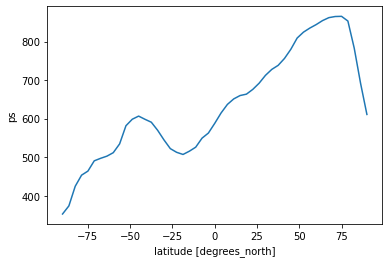

In [11]:
ps.plot()

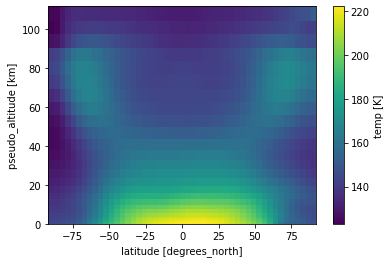

In [5]:
t.plot()

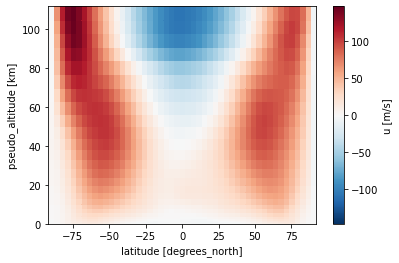

In [6]:
u.plot()

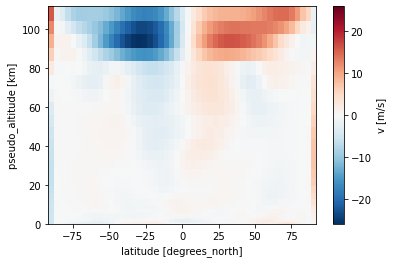

In [7]:
v.plot()

In [12]:
ds_out = xr.Dataset(dict(ps=ps, t=t, u=u, v=v, alt=zkm, aps=aps, bps=bps)) 

In [13]:
ds_out.to_netcdf('../data/MCD_v5.3_zonal_mean.nc')